## Re-sampling the dataset

Dealing with imbalanced datasets includes various strategies such as Random over-sampling (randomly increase the instances corresponding to the minority class by replicating them up to a constant degree).

##### Resources:

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [1]:
# Import libraries necessary for this part of the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the Santander Customer Satisfacations data from a CSV file

data = pd.read_csv('Data/processed_dataset.csv')

In [3]:
# Class count
count_class_0, count_class_1 = data.TARGET.value_counts()
print ('class_0 : {}'.format(count_class_0))
print ('class_1 : {}'.format(count_class_1))

class_0 : 73012
class_1 : 3008


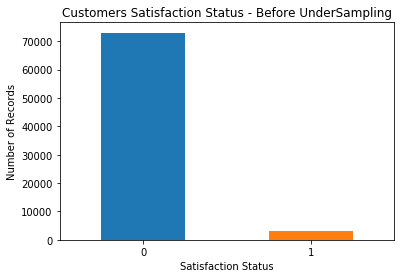

In [14]:
# Plot Satisfaction Status

data.TARGET.value_counts().plot(kind='bar', title='Count (target)',rot=0)
plt.title('Customers Satisfaction Status - Before UnderSampling')
plt.xlabel('Satisfaction Status')
plt.ylabel('Number of Records')
plt.show();

#### Random over-sampling

In [5]:
# Divide by class
class_0 = data[data['TARGET'] == 0]
class_1 = data[data['TARGET'] == 1]

class_0_under = class_0.sample(count_class_1, replace=True)
test_under = pd.concat([class_1, class_0_under], axis=0)

print('Random over-sampling:')
print(test_under.TARGET.value_counts())


Random over-sampling:
1    3008
0    3008
Name: TARGET, dtype: int64


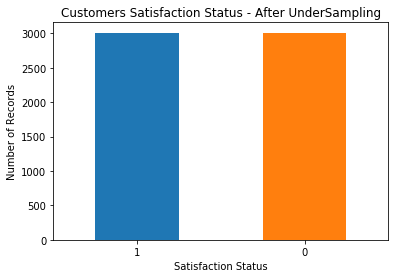

In [15]:
# Plot Satisfaction Status

test_under.TARGET.value_counts().plot(kind='bar', title='Count (target)',rot=0)
plt.title('Customers Satisfaction Status - After UnderSampling')
plt.xlabel('Satisfaction Status')
plt.ylabel('Number of Records')
plt.show();

#### Split Data

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# split data to features and Target
features = test_over[['Dimension 1','Dimension 2','Dimension 3', 'Dimension 4','Dimension 5',\
            'Dimension 6','Dimension 7', 'Dimension 8','Dimension 9', 'Dimension 10',\
            'Dimension 11','Dimension 12']]

satisfaction_status = test_under['TARGET']

In [8]:
#Split the data into train and test sets
training_features, test_features, training_target, test_target, = \
train_test_split(features,satisfaction_status,test_size = .30,random_state=12)

In [9]:
training_target.value_counts()

1    2147
0    2064
Name: TARGET, dtype: int64

In [10]:
test_target.value_counts()

0    944
1    861
Name: TARGET, dtype: int64

In [11]:
# Method to plot the ROC curve
def ROC_Score (y_test , predictions_test):
    from sklearn.metrics import roc_curve
    
    print('ROC Curve')
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, predictions_test)

    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')

    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    
    # show the plot
    plt.show()

In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

# Method to train & predict & evaluate the performance
def predictions (learner,training_features, test_features, training_target, test_target):
    clf_rf = learner.fit(training_features, training_target)
    predictions = clf_rf.predict(test_features)
    
    print("{} has trained . . . .".format(learner.__class__.__name__))
        #confusion matrix    
    confusion_df = pd.DataFrame(confusion_matrix(test_target, predictions),\
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],\
             index = ["Class " + str(class_name) for class_name in [0,1]])
    print('Confusion Matrix :')
    print(confusion_df,'\n')
    print('Classifying Report :')
    classifying_report = classification_report(test_target, predictions)
    print(classifying_report)
    print('Accuracy Score:',accuracy_score(test_target, predictions))
    print('Score: ',clf_rf.score(test_features, test_target))
    print('Fbeta Score:',fbeta_score(test_target, predictions, beta=0.5))
    print('Recall: ',recall_score(test_target, predictions))
    print('AUC: ',roc_auc_score(test_target, predictions))
    ROC_Score (test_target, predictions)
    print('---------------------------------------------------------------------------------')
   

-  1  -

RandomForestClassifier has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0                528                416
Class 1                365                496 

Classifying Report :
              precision    recall  f1-score   support

           0       0.59      0.56      0.57       944
           1       0.54      0.58      0.56       861

   micro avg       0.57      0.57      0.57      1805
   macro avg       0.57      0.57      0.57      1805
weighted avg       0.57      0.57      0.57      1805

Accuracy Score: 0.5673130193905818
Score:  0.5673130193905818
Fbeta Score: 0.5500110889332446
Recall:  0.5760743321718932
AUC:  0.5676981830350992
ROC Curve


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


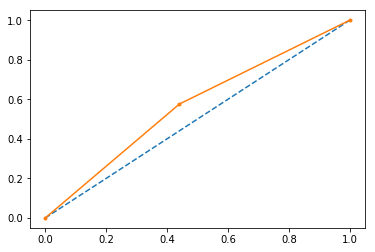

---------------------------------------------------------------------------------
-  2  -

GaussianNB has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0                936                  8
Class 1                860                  1 

Classifying Report :
              precision    recall  f1-score   support

           0       0.52      0.99      0.68       944
           1       0.11      0.00      0.00       861

   micro avg       0.52      0.52      0.52      1805
   macro avg       0.32      0.50      0.34      1805
weighted avg       0.33      0.52      0.36      1805

Accuracy Score: 0.5191135734072022
Score:  0.5191135734072022
Fbeta Score: 0.005574136008918618
Recall:  0.0011614401858304297
AUC:  0.496343431957322
ROC Curve


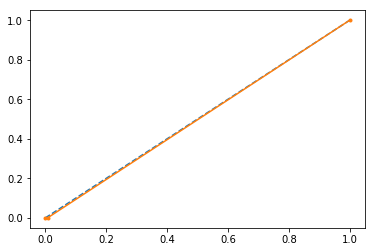

---------------------------------------------------------------------------------
-  3  -

LogisticRegression has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0                  0                944
Class 1                  1                860 

Classifying Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       944
           1       0.48      1.00      0.65       861

   micro avg       0.48      0.48      0.48      1805
   macro avg       0.24      0.50      0.32      1805
weighted avg       0.23      0.48      0.31      1805

Accuracy Score: 0.47645429362880887
Score:  0.47645429362880887
Fbeta Score: 0.5323758821344559
Recall:  0.9988385598141696
AUC:  0.4994192799070848
ROC Curve


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


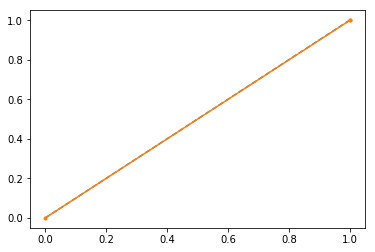

---------------------------------------------------------------------------------
-  4  -

DecisionTreeClassifier has trained . . . .
Confusion Matrix :
         Predicted Class 0  Predicted Class 1
Class 0                484                460
Class 1                356                505 

Classifying Report :
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       944
           1       0.52      0.59      0.55       861

   micro avg       0.55      0.55      0.55      1805
   macro avg       0.55      0.55      0.55      1805
weighted avg       0.55      0.55      0.55      1805

Accuracy Score: 0.5479224376731302
Score:  0.5479224376731302
Fbeta Score: 0.5348443126456259
Recall:  0.586527293844367
AUC:  0.5496195791255732
ROC Curve


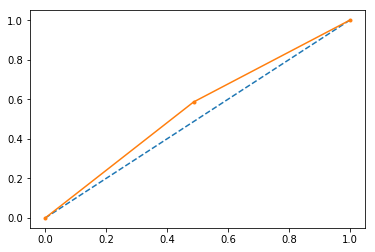

---------------------------------------------------------------------------------


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize the four models
clf_A = RandomForestClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = LogisticRegression(random_state=42)
clf_D = DecisionTreeClassifier()

# Collect results on the learners
num = 1
for clf in [clf_A, clf_B, clf_C, clf_D]:
    print ('- ',num,' -\n')
    clf_name = clf.__class__.__name__
    predictions(clf,training_features, test_features, training_target, test_target)
    num =num+1